In [2]:
%load_ext autoreload
%autoreload 2

import cc.count.countcells as cc 

In [3]:
imdir = 'data/x4/raw/AC_counted'

log_params = {
    'min_s': 1,
    'max_s': 35,
    'num_s': 10,
    'thresh':0.15,
    'overlap': 0.001,
    'log_scale': False,
    'exclude_border': False
}

x4_xounts = cc.collect_cell_counts(
    imdir, 
    log_params = log_params, 
    verbose = False, 
    testi = 0)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [4]:
import cc.compare.compare as comp

x4a = comp.extract_panda(x4_xounts)
x4a

,id,name,num_cells,slice_area,cells_per_um2,cells_per_mm2,percent_slice
0,AC001,AC001_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,34,116508.444444,0.000292,291.824341,100.000000
1,AC002,AC002_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,30,116492.444444,0.000258,257.527431,99.986267
2,AC003,AC003_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,32,116488.888889,0.000275,274.704311,99.983215
3,AC004,AC004_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,41,116456.888889,0.000352,352.061612,99.955750
4,AC005,AC005_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,27,116206.666667,0.000232,232.344673,99.740982
...,...,...,...,...,...,...,...
85,AC086,AC086_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,12,116404.000000,0.000103,103.089241,99.910355
86,AC087,AC087_MAX_1616E_GFAP.1.1000_Iba1.1.1000_10.21....,11,116497.777778,0.000094,94.422402,99.990845
87,AC088,AC088_1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_2...,9,116508.000000,0.000077,77.247914,99.999619
88,AC089,AC089_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,8,115940.444444,0.000069,69.000943,99.512482


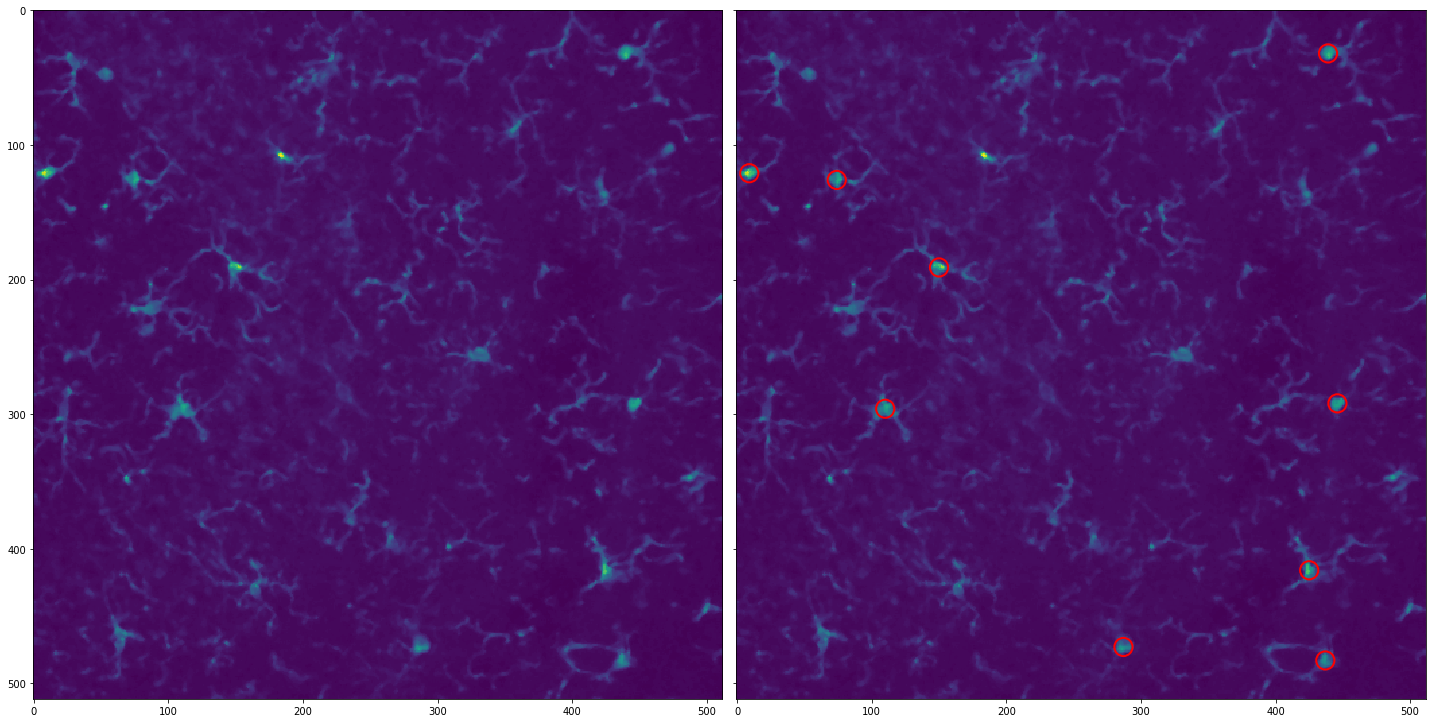

In [5]:
x4_xounts[89].overlay()

In [6]:
import pickle
PIK = 'data/x4/processed/x4_counts_v_AC_003.pkl'
with open(PIK, 'wb') as f:
    pickle.dump(x4_xounts, f)

In [7]:
import pandas as pd 

ac_file = 'data/x4/raw/AC_counted/AC_counts_cmh.csv'

x4m = pd.read_csv(ac_file)

x4m

,id,gt,location,man_count,area_um2,cells_per_mm2
0,AC001,ko,DG,27,116508.4444,231.742859
1,AC002,ko,DG,27,116508.4444,231.742859
2,AC003,ko,DG,29,116508.4444,248.908997
3,AC004,ko,DG,34,116508.4444,291.824341
4,AC005,ko,DG,20,116508.4444,171.661377
...,...,...,...,...,...,...
85,AC086,wt,CA2,22,116508.4444,188.827515
86,AC087,wt,CA3,16,116508.4444,137.329102
87,AC088,wt,CA3,14,116508.4444,120.162964
88,AC089,wt,CA3,19,116508.4444,163.078308


In [8]:
x4b = pd.merge(x4a, x4m, on='id' )
x4b

,id,name,num_cells,slice_area,cells_per_um2,cells_per_mm2_x,percent_slice,gt,location,man_count,area_um2,cells_per_mm2_y
0,AC001,AC001_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,34,116508.444444,0.000292,291.824341,100.000000,ko,DG,27,116508.4444,231.742859
1,AC002,AC002_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,30,116492.444444,0.000258,257.527431,99.986267,ko,DG,27,116508.4444,231.742859
2,AC003,AC003_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,32,116488.888889,0.000275,274.704311,99.983215,ko,DG,29,116508.4444,248.908997
3,AC004,AC004_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,41,116456.888889,0.000352,352.061612,99.955750,ko,DG,34,116508.4444,291.824341
4,AC005,AC005_MAX_1613E_GFAP.1.1000_Iba1.1.1000_10.21....,27,116206.666667,0.000232,232.344673,99.740982,ko,DG,20,116508.4444,171.661377
...,...,...,...,...,...,...,...,...,...,...,...,...
85,AC086,AC086_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,12,116404.000000,0.000103,103.089241,99.910355,wt,CA2,22,116508.4444,188.827515
86,AC087,AC087_MAX_1616E_GFAP.1.1000_Iba1.1.1000_10.21....,11,116497.777778,0.000094,94.422402,99.990845,wt,CA3,16,116508.4444,137.329102
87,AC088,AC088_1616E_GFAP.1.1000_Iba1.1.1000_10.21.19_2...,9,116508.000000,0.000077,77.247914,99.999619,wt,CA3,14,116508.4444,120.162964
88,AC089,AC089_MAX_1616E_Section2_GFAP.1.1000_Iba1.1.10...,8,115940.444444,0.000069,69.000943,99.512482,wt,CA3,19,116508.4444,163.078308


In [10]:
from scipy.stats import pearsonr

pearsonr(x4b['num_cells'], x4b['man_count'])

(0.8740549376586377, 2.4879409558349015e-29)

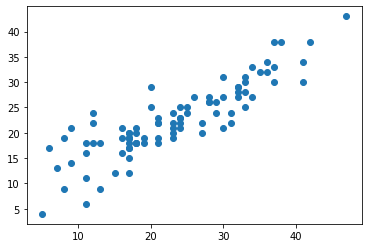

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x4b['num_cells'], x4b['man_count'])

Text(0, 0.5, 'Count')

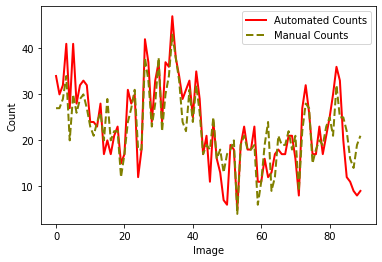

In [14]:
# multiple line plot
#plt.fig( )
plt.plot(range(len(x4b['num_cells'])), x4b['num_cells'], marker='', color='red', linewidth=2, label = 'Automated Counts')
plt.plot(range(len(x4b['man_count'])), x4b['man_count'], marker='', color='olive', linewidth=2, linestyle='dashed', label='Manual Counts')
plt.legend()
plt.xlabel('Image')
plt.ylabel('Count')

In [15]:
df_ctx_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]
df_ctx_wt

,id,gt,location,cells_per_mm2_x,cells_per_mm2_y,num_cells,man_count
51,AC052,wt,Ctx,163.941342,154.495239,19,18
52,AC053,wt,Ctx,154.517048,171.661377,18,20
53,AC054,wt,Ctx,75.112168,56.250000,5,4
54,AC055,wt,Ctx,238.560268,238.560268,19,19
55,AC056,wt,Ctx,197.453517,180.244446,23,21
56,AC057,wt,Ctx,154.682290,154.495239,18,18
57,AC058,wt,Ctx,154.535915,154.495239,18,18
58,AC059,wt,Ctx,197.549998,163.078308,23,19
59,AC060,wt,Ctx,173.898991,173.076923,11,6
60,AC061,wt,Ctx,94.809060,94.413757,11,11


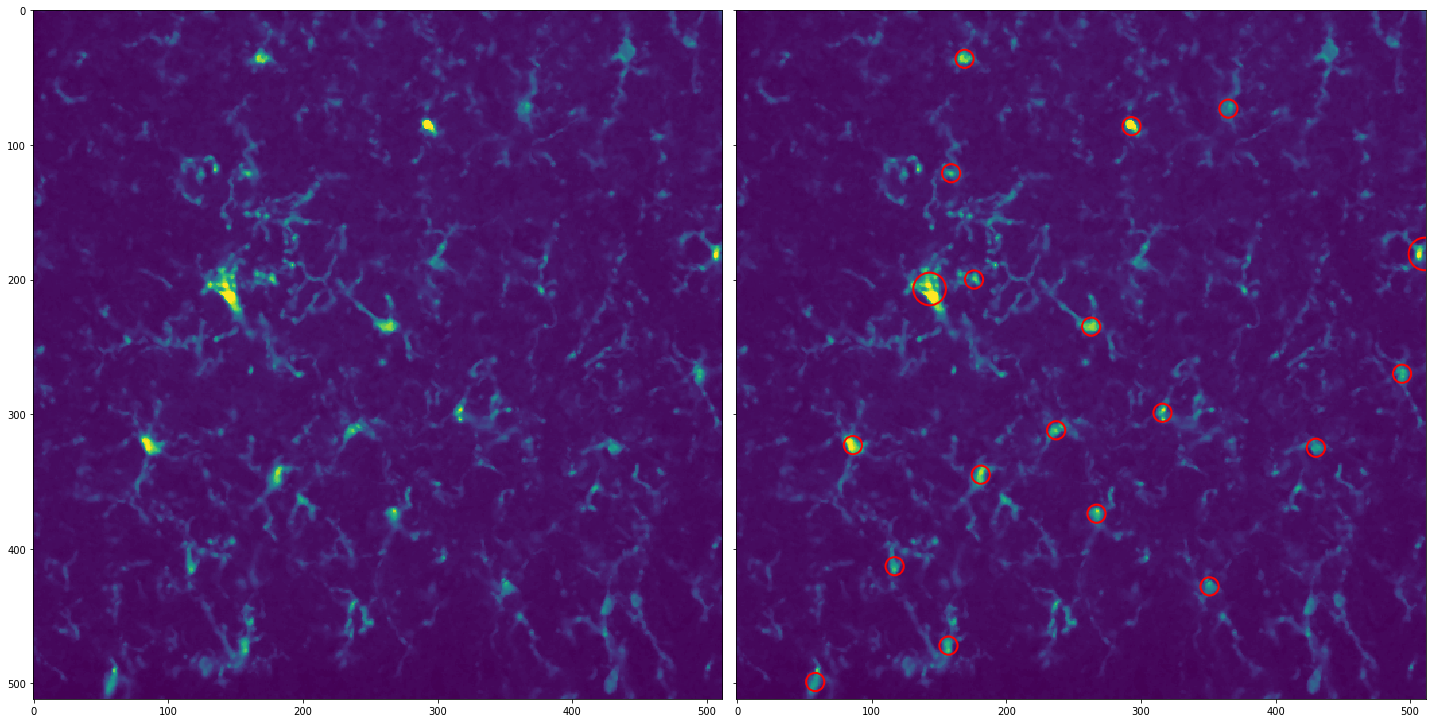

In [17]:
x4_xounts[51].overlay()

In [18]:
# Ctx
df_ctx_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

df_ctx_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'Ctx'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

# CA1
df_ca1_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA1'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

df_ca1_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA1'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

# CA2
df_ca2_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA2'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

df_ca2_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA2'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

# CA3
df_ca3_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'CA3'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

df_ca3_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'CA3'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

# DG

df_dg_wt = x4b.loc[(x4b['gt'] == 'wt') & (x4b['location'] == 'DG'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]

df_dg_ko = x4b.loc[(x4b['gt'] == 'ko') & (x4b['location'] == 'DG'), ['id', 'gt', 'location', 'cells_per_mm2_x', 'cells_per_mm2_y', 'num_cells', 'man_count']]



In [19]:
df_dg_ko

,id,gt,location,cells_per_mm2_x,cells_per_mm2_y,num_cells,man_count
0,AC001,ko,DG,291.824341,231.742859,34,27
1,AC002,ko,DG,257.527431,231.742859,30,27
2,AC003,ko,DG,274.704311,248.908997,32,29
3,AC004,ko,DG,352.061612,291.824341,41,34
4,AC005,ko,DG,232.344673,171.661377,27,20
5,AC006,ko,DG,351.905823,257.492065,41,30
6,AC007,ko,DG,240.356185,223.159790,28,26
7,AC008,ko,DG,274.723178,248.908997,32,29
8,AC009,ko,DG,283.303954,257.492065,33,30
9,AC010,ko,DG,275.078990,231.742859,32,27


In [30]:
# Ctx
data_all =[
    df_ctx_wt['cells_per_mm2_x'],
    df_ctx_wt['cells_per_mm2_y'],
    df_ctx_ko['cells_per_mm2_x'],
    df_ctx_ko['cells_per_mm2_y'],
    df_ca1_wt['cells_per_mm2_x'],
    df_ca1_wt['cells_per_mm2_y'],
    df_ca1_ko['cells_per_mm2_x'],
    df_ca1_ko['cells_per_mm2_y'],
    df_ca2_wt['cells_per_mm2_x'],
    df_ca2_wt['cells_per_mm2_y'],
    df_ca2_ko['cells_per_mm2_x'],
    df_ca2_ko['cells_per_mm2_y'],
    df_ca3_wt['cells_per_mm2_x'],
    df_ca3_wt['cells_per_mm2_y'],
    df_ca3_ko['cells_per_mm2_x'],
    df_ca3_ko['cells_per_mm2_y'],
    df_dg_wt['cells_per_mm2_x'],
    df_dg_wt['cells_per_mm2_y'],
    df_dg_ko['cells_per_mm2_x'],
    df_dg_ko['cells_per_mm2_y']
]
data_all

[51    163.941342
 52    154.517048
 53     75.112168
 54    238.560268
 55    197.453517
 56    154.682290
 57    154.535915
 58    197.549998
 59    173.898991
 60     94.809060
 61    137.618361
 62    205.993652
 63    182.049032
 64    176.951439
 65    156.892217
 66    146.097200
 67    146.136272
 68    180.271265
 69    180.416504
 70    138.162894
 71    137.329102
 Name: cells_per_mm2_x, dtype: float64, 51    154.495239
 52    171.661377
 53     56.250000
 54    238.560268
 55    180.244446
 56    154.495239
 57    154.495239
 58    163.078308
 59    173.076923
 60     94.413757
 61    163.078308
 62    205.993652
 63    154.495239
 64    164.794922
 65    180.244446
 66    163.078308
 67    163.078308
 68    188.827515
 69    154.495239
 70    180.244446
 71    154.495239
 Name: cells_per_mm2_y, dtype: float64, 10    205.993652
 11    205.993652
 12    197.490440
 13    240.429567
 14    146.077113
 15    172.092685
 16    145.926087
 17    181.349238
 18    197.765914
 19 

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

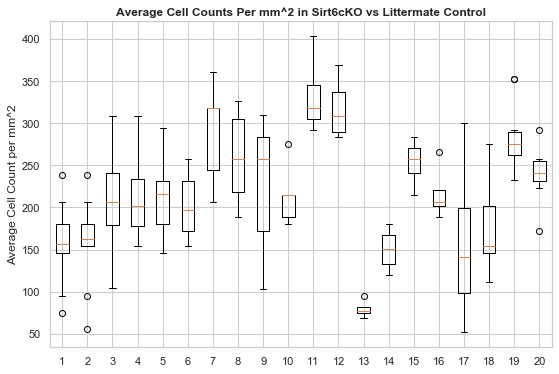

In [40]:
import matplotlib.pyplot as plt


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_all)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [49]:
data_wt =[
    df_ctx_wt['cells_per_mm2_x'],
    df_ctx_wt['cells_per_mm2_y'],
    df_ca1_wt['cells_per_mm2_x'],
    df_ca1_wt['cells_per_mm2_y'],
    df_ca2_wt['cells_per_mm2_x'],
    df_ca2_wt['cells_per_mm2_y'],
    df_ca3_wt['cells_per_mm2_x'],
    df_ca3_wt['cells_per_mm2_y'],
    df_dg_wt['cells_per_mm2_x'],
    df_dg_wt['cells_per_mm2_y']
]
data_wt

[51    163.941342
 52    154.517048
 53     75.112168
 54    238.560268
 55    197.453517
 56    154.682290
 57    154.535915
 58    197.549998
 59    173.898991
 60     94.809060
 61    137.618361
 62    205.993652
 63    182.049032
 64    176.951439
 65    156.892217
 66    146.097200
 67    146.136272
 68    180.271265
 69    180.416504
 70    138.162894
 71    137.329102
 Name: cells_per_mm2_x, dtype: float64, 51    154.495239
 52    171.661377
 53     56.250000
 54    238.560268
 55    180.244446
 56    154.495239
 57    154.495239
 58    163.078308
 59    173.076923
 60     94.413757
 61    163.078308
 62    205.993652
 63    154.495239
 64    164.794922
 65    180.244446
 66    163.078308
 67    163.078308
 68    188.827515
 69    154.495239
 70    180.244446
 71    154.495239
 Name: cells_per_mm2_y, dtype: float64, 72    231.764962
 73    274.801818
 74    223.228766
 75    294.602422
 76    145.952257
 77    197.499485
 78    146.027480
 79    180.262325
 80    215.673419
 Nam

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

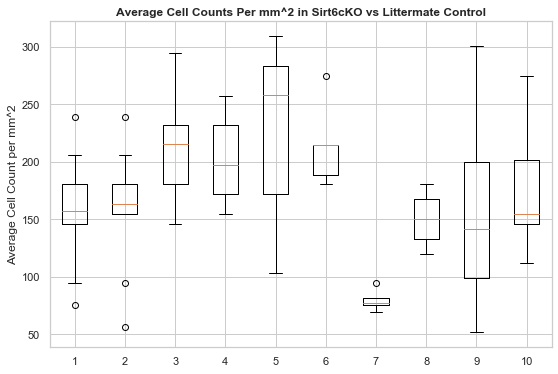

In [50]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_wt)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [51]:
data_ko = [
    df_ctx_ko['cells_per_mm2_x'],
    df_ctx_ko['cells_per_mm2_y'],
    df_ca1_ko['cells_per_mm2_x'],
    df_ca1_ko['cells_per_mm2_y'],
    df_ca2_ko['cells_per_mm2_x'],
    df_ca2_ko['cells_per_mm2_y'],
    df_ca3_ko['cells_per_mm2_x'],
    df_ca3_ko['cells_per_mm2_y'],
    df_dg_ko['cells_per_mm2_x'],
    df_dg_ko['cells_per_mm2_y']
]

Text(0.5, 1, 'Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control')

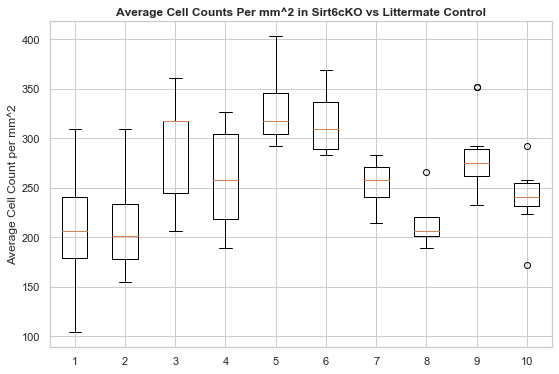

In [52]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_ko)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

#ax.set_xticklabels(['Control Cortex', 'Control Hip', 'S6cKO Cortex', 'S6cKO Hip'])
ax.set_ylabel('Average Cell Count per mm^2') 
ax.set_title('Average Cell Counts Per mm^2 in Sirt6cKO vs Littermate Control', fontsize = 12, fontweight = 'bold')

In [53]:
x4wt_a = x4b.loc[(x4b['gt']=='wt'), ['gt', 'location', 'cells_per_mm2_x']]
x4wt_a['location'] = x4wt_a['location'] + '_auto'
x4wt_a.rename(columns = {'cells_per_mm2_x':'Cells'}, inplace = True)
x4wt_a

,gt,location,Cells
41,wt,DG_auto,300.462426
42,wt,DG_auto,249.021090
43,wt,DG_auto,146.002397
44,wt,DG_auto,180.333187
45,wt,DG_auto,94.463125
46,wt,DG_auto,206.003868
47,wt,DG_auto,137.433955
48,wt,DG_auto,111.628866
49,wt,DG_auto,60.118405
50,wt,DG_auto,51.606886


In [54]:
x4wt_m = x4b.loc[(x4b['gt']=='wt'), ['gt', 'location', 'cells_per_mm2_y']]
x4wt_m['location'] = x4wt_m['location'] + '_manual'
x4wt_m.rename(columns = {'cells_per_mm2_y':'Cells'}, inplace = True)
x4wt_m

,gt,location,Cells
41,wt,DG_manual,274.658203
42,wt,DG_manual,223.159790
43,wt,DG_manual,145.912170
44,wt,DG_manual,163.078308
45,wt,DG_manual,154.495239
46,wt,DG_manual,214.576721
47,wt,DG_manual,137.329102
48,wt,DG_manual,154.495239
49,wt,DG_manual,111.579895
50,wt,DG_manual,145.912170


In [55]:
frames =[x4wt_a, x4wt_m]
cat = pd.concat(frames)
cat

,gt,location,Cells
41,wt,DG_auto,300.462426
42,wt,DG_auto,249.021090
43,wt,DG_auto,146.002397
44,wt,DG_auto,180.333187
45,wt,DG_auto,94.463125
...,...,...,...
85,wt,CA2_manual,188.827515
86,wt,CA3_manual,137.329102
87,wt,CA3_manual,120.162964
88,wt,CA3_manual,163.078308


gt   location       Cells
75  wt   CA1_auto  294.602422
78  wt   CA1_auto  146.027480
77  wt   CA1_auto  197.499485
76  wt   CA1_auto  145.952257
74  wt   CA1_auto  223.228766
..  ..        ...         ...
48  wt  DG_manual  154.495239
49  wt  DG_manual  111.579895
50  wt  DG_manual  145.912170
41  wt  DG_manual  274.658203
44  wt  DG_manual  163.078308

[98 rows x 3 columns]


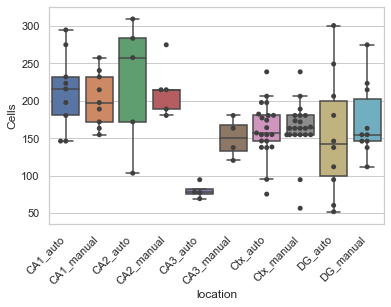

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = cat.sort_values(by=['location'])
print (grouped)
sns.set(style="whitegrid")


ax = sns.boxplot(x="location", y="Cells", data=grouped, showfliers = False)
ax = sns.swarmplot(x="location", y="Cells", data=grouped, color=".25")
ax.set_xticklabels(ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
    #fontsize='x-large')
plt.show()

gt   location       Cells
28  ko   CA1_auto  206.002297
26  ko   CA1_auto  360.677386
29  ko   CA1_auto  283.399110
32  ko   CA1_auto  317.740815
31  ko   CA1_auto  206.150933
..  ..        ...         ...
7   ko  DG_manual  248.908997
8   ko  DG_manual  257.492065
9   ko  DG_manual  231.742859
0   ko  DG_manual  231.742859
1   ko  DG_manual  231.742859

[82 rows x 3 columns]


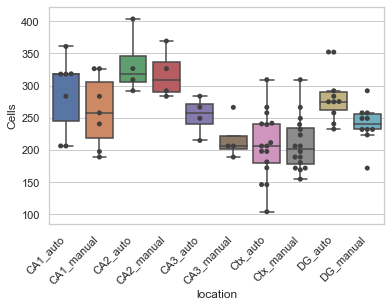

In [58]:
x4ko_a = x4b.loc[(x4b['gt']=='ko'), ['gt', 'location', 'cells_per_mm2_x']]
x4ko_a['location'] = x4ko_a['location'] + '_auto'
x4ko_a.rename(columns = {'cells_per_mm2_x':'Cells'}, inplace = True)

x4ko_m = x4b.loc[(x4b['gt']=='ko'), ['gt', 'location', 'cells_per_mm2_y']]
x4ko_m['location'] = x4ko_m['location'] + '_manual'
x4ko_m.rename(columns = {'cells_per_mm2_y':'Cells'}, inplace = True)

frames =[x4ko_a, x4ko_m]
cat_ko = pd.concat(frames)

frames =[x4ko_a, x4ko_m]
cat_ko = pd.concat(frames)

grouped_ko = cat_ko.sort_values(by=['location'])
print (grouped_ko)
sns.set(style="whitegrid")

ax = sns.boxplot(x="location", y="Cells", data=grouped_ko, showfliers = False)
ax = sns.swarmplot(x="location", y="Cells", data=grouped_ko, color=".25")
ax.set_xticklabels(ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')
    #fontsize='x-large')
plt.show()